In [147]:
%load_ext autoreload
%autoreload 2
import pickle
import pandas  as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)

import matplotlib.pyplot as plt
import time
from pprint import pprint
import plotly.graph_objects as go

from utils import get_all_matches_by_team, get_all_team_names

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [209]:
liga = pickle.load(open('./data/la_liga.pkl','rb'))
get_all_team_names(liga)

['alaves',
 'almeria',
 'athletic club',
 'atletico de madrid',
 'barcelona',
 'cadiz',
 'celta de vigo',
 'getafe',
 'girona',
 'granada',
 'las palmas',
 'mallorca',
 'osasuna',
 'rayo vallecano',
 'real betis',
 'real madrid',
 'real sociedad',
 'sevilla',
 'valencia',
 'villarreal']

### Data Viz with Matplotlib

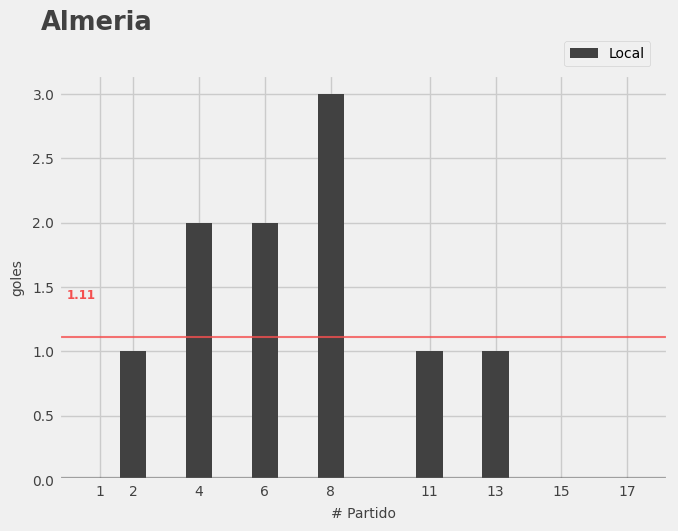

In [211]:
busqueda = 'almeria'
all_matches_df = get_all_matches_by_team(busqueda,data_list=liga)
# all_matches_df['#_partido'] = range(1, len(all_matches_df)+1)
all_matches_df_l = all_matches_df[all_matches_df['equipo'].str.endswith('L')]
all_matches_df_v = all_matches_df[all_matches_df['equipo'].str.endswith('V')]

visitante_ = False
estadistico_a_mirar= 'goles'
if visitante_:
    dataset = all_matches_df_v.copy()
    localidad = 'Visitante'
else:
    dataset = all_matches_df_l.copy()
    localidad = 'Local'
plt.style.use('fivethirtyeight')

# Setting size of our plot
fig, ax = plt.subplots(figsize=(7,5))

nombre_equipo = dataset['equipo'].iat[0].split('_')[0].title()
media = round(dataset[estadistico_a_mirar].mean(),2)
# Plotting each occupation category
plt.bar(x=dataset['jornada'], height = dataset[estadistico_a_mirar].values , color='#414141', lw=2.2, alpha = 1, zorder = 2,label = localidad)
# plt.bar(x=[1] , height = nitems_final[nitems_final['target']==1]['count'].iat[0], color='#F45050', lw=2.2, alpha = 1, zorder = 1,label = 'sampled(items)')
# X and y labels
plt.ylabel(estadistico_a_mirar, fontsize=10, color='#414141',labelpad=6)
plt.xlabel('# Partido', fontsize=10, color='#414141',labelpad=6)

# legend
plt.legend(bbox_to_anchor=(0.9, 1.1),loc='upper center',fancybox=True, fontsize = 10)


# Bolded horizontal line at y=0
plt.axhline(y=0, color='#414141', linewidth=4.5, alpha=.5)
plt.axhline(y=media, color='#F45050', linewidth=1.5, alpha=.8)

# Y-labels to only these
# range_y_ticks = dataset[estadistico_a_mirar]
# ax.set_yticks(range_y_ticks);
# ax.set_yticklabels(labels=dataset[estadistico_a_mirar], fontsize=10, color='#414141');
plt.yticks(fontsize=10, color='#414141')


# # X-labels and changing label names
ax.set_xticks(dataset['jornada']);
ax.set_xticklabels([str(i) for i in dataset['jornada']], fontsize=10, color='#414141');

# Text labels for each plotted line
plt.text(x = dataset['jornada'].min() -1.8, y = dataset[estadistico_a_mirar].max() + 0.5, s = f'{nombre_equipo}', fontsize=18.5, fontweight='bold', color='#414141');
# plt.text(x = dataset['jornada'].max() - 2, y = dataset[estadistico_a_mirar].max() + 1.5, s = localidad, fontsize=10.5, color='#414141');
plt.text(x = dataset['jornada'].min() -1, y = dataset[estadistico_a_mirar].mean() + 0.3, s = f"{media}", fontsize=8.5, color='#F45050',fontweight='bold');


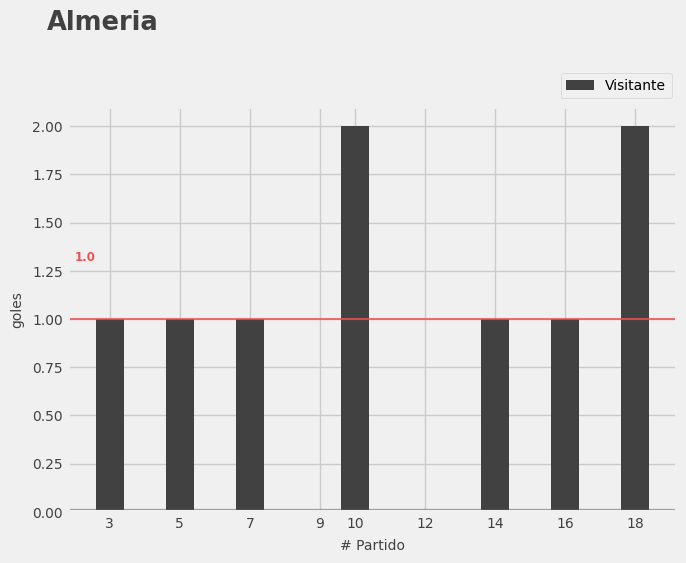

In [212]:
busqueda = 'almeria'
all_matches_df = get_all_matches_by_team(busqueda,data_list=liga)
all_matches_df_l = all_matches_df[all_matches_df['equipo'].str.endswith('L')]
all_matches_df_v = all_matches_df[all_matches_df['equipo'].str.endswith('V')]

visitante_ = True
estadistico_a_mirar= 'goles'
if visitante_:
    dataset = all_matches_df_v.copy()
    localidad = 'Visitante'
else:
    dataset = all_matches_df_l.copy()
    localidad = 'Local'
plt.style.use('fivethirtyeight')

# Setting size of our plot
fig, ax = plt.subplots(figsize=(7,5))

nombre_equipo = dataset['equipo'].iat[0].split('_')[0].title()
media = round(dataset[estadistico_a_mirar].mean(),2)
# Plotting each occupation category
plt.bar(x=dataset['jornada'], height = dataset[estadistico_a_mirar].values , color='#414141', lw=2.2, alpha = 1, zorder = 2,label = localidad)
# plt.bar(x=[1] , height = nitems_final[nitems_final['target']==1]['count'].iat[0], color='#F45050', lw=2.2, alpha = 1, zorder = 1,label = 'sampled(items)')
# X and y labels
plt.ylabel(estadistico_a_mirar, fontsize=10, color='#414141',labelpad=6)
plt.xlabel('# Partido', fontsize=10, color='#414141',labelpad=6)

# legend
plt.legend(bbox_to_anchor=(0.9, 1.1),loc='upper center',fancybox=True, fontsize = 10)

# Bolded horizontal line at y=0
plt.axhline(y=0, color='#414141', linewidth=4.5, alpha=.5)
plt.axhline(y=media, color='#F45050', linewidth=1.5, alpha=.8)

# Y-labels to only these
# range_y_ticks = dataset[estadistico_a_mirar]
# ax.set_yticks(range_y_ticks);
# ax.set_yticklabels(labels=dataset[estadistico_a_mirar], fontsize=10, color='#414141');
plt.yticks(fontsize=10, color='#414141')


# # X-labels and changing label names
ax.set_xticks(dataset['jornada']);
ax.set_xticklabels(dataset['jornada'], fontsize=10, color='#414141');


# Text labels for each plotted line
plt.text(x = dataset['jornada'].min() -1.8, y = dataset[estadistico_a_mirar].max() + 0.5, s = f'{nombre_equipo}', fontsize=18.5, fontweight='bold', color='#414141');
plt.text(x = dataset['jornada'].min() -1, y = dataset[estadistico_a_mirar].mean() + 0.3, s = f"{media}", fontsize=8.5, color='#F45050',fontweight='bold');


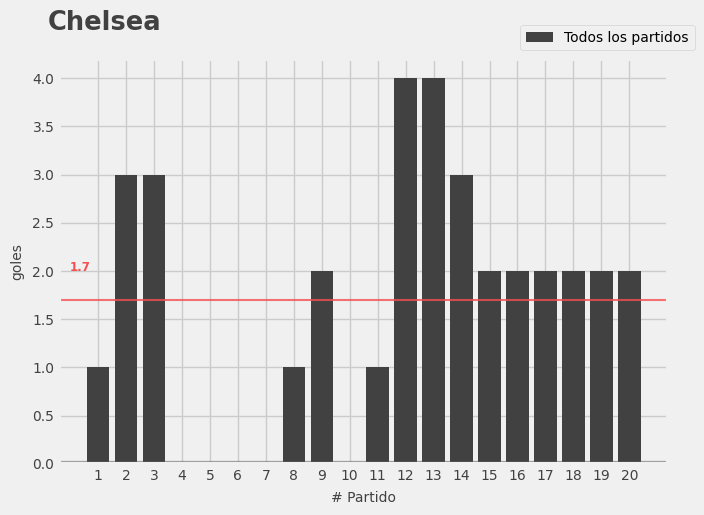

In [346]:
busqueda = 'chelsea'
all_matches_df = get_all_matches_by_team(busqueda,data_list=liga)
dataset = all_matches_df.copy()

visitante_ = False
estadistico_a_mirar= 'goles'
plt.style.use('fivethirtyeight')

# Setting size of our plot
fig, ax = plt.subplots(figsize=(7,5))

nombre_equipo = dataset['equipo'].iat[0].split('_')[0].title()
media = round(dataset[estadistico_a_mirar].mean(),2)
# Plotting each occupation category
plt.bar(x=dataset['jornada'], height = dataset[estadistico_a_mirar].values , color='#414141', lw=2.2, alpha = 1, zorder = 2,label = 'Todos los partidos')
# plt.bar(x=[1] , height = nitems_final[nitems_final['target']==1]['count'].iat[0], color='#F45050', lw=2.2, alpha = 1, zorder = 1,label = 'sampled(items)')
# X and y labels
plt.ylabel(estadistico_a_mirar, fontsize=10, color='#414141',labelpad=6)
plt.xlabel('# Partido', fontsize=10, color='#414141',labelpad=6)

# legend
plt.legend(bbox_to_anchor=(0.9, 1.1),loc='upper center',fancybox=True, fontsize = 10)

# Bolded horizontal line at y=0
plt.axhline(y=0, color='#414141', linewidth=4.5, alpha=.5)
plt.axhline(y=media, color='#F45050', linewidth=1.5, alpha=.8)

# Y-labels to only these
# range_y_ticks = dataset[estadistico_a_mirar]
# ax.set_yticks(range_y_ticks);
# ax.set_yticklabels(labels=dataset[estadistico_a_mirar], fontsize=10, color='#414141');
plt.yticks(fontsize=10, color='#414141')


# # X-labels and changing label names
ax.set_xticks(dataset['jornada']);
ax.set_xticklabels(dataset['jornada'], fontsize=10, color='#414141');


# Text labels for each plotted line
plt.text(x = dataset['jornada'].min() -1.8, y = dataset[estadistico_a_mirar].max() + 0.5, s = f'{nombre_equipo}', fontsize=18.5, fontweight='bold', color='#414141');
plt.text(x = dataset['jornada'].min() -1, y = dataset[estadistico_a_mirar].mean() + 0.3, s = f"{media}", fontsize=8.5, color='#F45050',fontweight='bold');


### Data Viz Plotly

In [204]:
liga = pickle.load(open('./data/serie_a.pkl','rb'))
get_all_team_names(liga)

['ac milan',
 'atalanta',
 'bolonia',
 'cagliari',
 'empoli',
 'fiorentina',
 'frosinone',
 'genoa',
 'inter',
 'juventus',
 'lazio',
 'lecce',
 'monza',
 'napoles',
 'roma',
 'salernitana',
 'sassuolo',
 'torino',
 'udinese',
 'verona']

In [205]:
equipo_local = 'juventus'
equipo_visitante = 'salernitana'
equipo_local_all_matches_df = get_all_matches_by_team(equipo_local,data_list=liga)
equipo_visitante_all_matches_df = get_all_matches_by_team(equipo_visitante,data_list=liga)
# all_matches_df['#_partido'] = range(1, len(all_matches_df)+1)
# all_matches_df_l = all_matches_df[all_matches_df['equipo'].str.endswith('L')]
# all_matches_df_v = all_matches_df[all_matches_df['equipo'].str.endswith('V')]

In [207]:
estadistico_a_mirar = 'corneres'

# --- Local ---
y_l = equipo_local_all_matches_df[estadistico_a_mirar]
x_l = equipo_local_all_matches_df['jornada']
# --- Visitante ---
y_v = equipo_visitante_all_matches_df[estadistico_a_mirar]
x_v = equipo_local_all_matches_df['jornada']

fig = go.Figure(data=[
    go.Bar(name=equipo_local.title(), x=x_l, y=y_l,marker_color = ['#414141'] * len(x_l)),
    go.Bar(name=equipo_visitante.title(), x=x_v, y=y_v,marker_color = ['#FF9800'] * len(x_l)),
    
])
# Change the bar mode
fig.add_hline(y=0,line_width=1,line_color="#414141",opacity = 0.8)

fig.add_hline(y=y_l.mean(),line_width=1.5, layer='below',line_color="#414141",opacity=0.8,annotation_text=f"   ({round(y_l.mean(),2)}) mean", annotation_position="right", line_dash="dot")
fig.add_hline(y=y_v.mean(),line_width=1.5, layer='below', line_color="#FF9800",opacity=0.8,annotation_text=f"   ({round(y_v.mean(),2)}) mean", annotation_position="right", line_dash="dot")
fig.update_layout(barmode='group')

fig.update_layout(
    title=dict(text=f'<b>{equipo_local.title()} vs {equipo_visitante.title()}</b><br><sup><i>{estadistico_a_mirar.title()}</i><sup>', font=dict(size=25,color="#414141")),
    plot_bgcolor='white',
    xaxis_tickfont_size=13,
    yaxis=dict(
        title=estadistico_a_mirar.title(),
        titlefont_size=14,
        tickfont_size=12,
    ),
    xaxis=dict(
        title='Jornada',
        titlefont_size=14,
        tickfont_size=12,
        tickmode = 'array',
        tickvals = equipo_local_all_matches_df['jornada'],
        # ticktext = equipo_local_all_matches_df['jornada'],
    ),
    barmode='group',
    bargap=0.3, # gap between bars of adjacent location coordinates.
    bargroupgap=0 # gap between bars of the same location coordinate.
)
fig.update_xaxes(
    mirror=True,
    # ticks='outside',
    showline=True,
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    # ticks='outside',
    showline=True,
    gridcolor='lightgrey'
)
fig.show()